# <u>**Overview**

This project aims to classify images of different traffics signs using a leNet convolutional neural network

The dataset contains 43 different classes of images. Classes are as listed below

* 0 - Speed limit 20 km/h
* 1 - Speed limit 30 km/h
* 2 - Speed limit 50 km/h
* 3 - Speed limit 60 km/h
* 4 - Speed limit 70 km/h
* 5 - Speed limit 80 km/h
* 6 - End of speed limit 80 km/h
* 7 - Speed limit 100km/h
* 8 - Speed limit 120km/h
* 9 - No passing
* 10 - No passing for vehicles over 3.5 metric tons
* 11 - Right-of-way at the next intersection
* 12 - Priority road
* 13 - Yield
* 14 - Stop
* 15 - No vehicles
* 16 - Vehicles over 3.5 metric tons prohibited
* 17 - No entry
* 18 - General caution
* 19 - Dangerous curve to the left
* 20 - Dangerous curve to the right
* 21 - Double curve
* 22 - Bumpy road
* 23 - Slippery road
* 24 - Road narrows on the right
* 25 - Road work
* 26 - Traffic signals
* 27 - Pedestrians
* 28 - Children crossing
* 29 - Bicycles crossing
* 30 - Beware of ice/snow
* 31 - Wild animals crossing
* 32 - End of all speed and passing limits
* 33 - Turn right ahead
* 34 - Turn left ahead
* 35 - Ahead only
* 36 - Go straight or right
* 37 - Go straight or left
* 38 - Keep right
* 39 - Keep left
* 40 - Roundabout mandatory
* 41 - End of no passing
* 42 - End of no passing by vehicles over 3.5 metric tons

# <u>**Importing Libraries and dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle # The pickle module implements binary protocols for serializing and de-serializing a Python object structure.

In [2]:
with open("train.p", mode='rb') as training:
    train = pickle.load(training)
with open("valid.p", mode='rb') as validation:
    valid = pickle.load(validation)
with open("test.p", mode='rb') as testing:
    test = pickle.load(testing)

In [3]:
X_train, y_train = train['features'], train['labels']
X_val, y_val = valid['features'], valid['labels']
X_test, y_test = test['features'], valid['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_val.shape

(4410, 32, 32, 3)

In [7]:
y_val.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(4410,)

# <u>**Image Exploration**

31

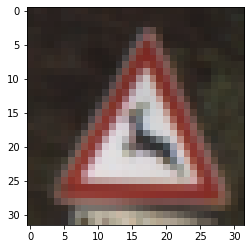

In [10]:
i = 500
plt.imshow(X_train[i])
y_train[i]

38

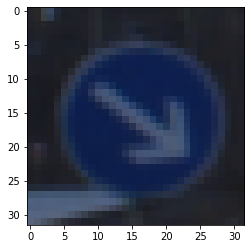

In [11]:
i = 2000
plt.imshow(X_val[i])
y_val[i]

31

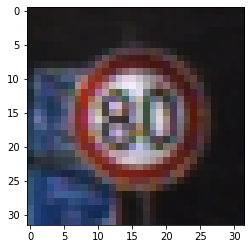

In [12]:
i = 30
plt.imshow(X_test[i])
y_test[i]

# <u>**Data Preparation**

In [13]:
# shuffle training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
# Convert images from colour to greyscale by averaging pixels
X_train_grey = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_grey = np.sum(X_test/3, axis = 3, keepdims = True)
X_val_grey = np.sum(X_val/3, axis = 3, keepdims = True)

In [15]:
X_train_grey

array([[[[ 35.        ],
         [ 35.33333333],
         [ 35.66666667],
         ...,
         [ 33.66666667],
         [ 38.        ],
         [ 40.66666667]],

        [[ 35.66666667],
         [ 36.66666667],
         [ 37.33333333],
         ...,
         [ 35.        ],
         [ 41.33333333],
         [ 39.33333333]],

        [[ 35.        ],
         [ 36.66666667],
         [ 36.        ],
         ...,
         [ 36.66666667],
         [ 41.        ],
         [ 39.66666667]],

        ...,

        [[ 21.33333333],
         [ 22.33333333],
         [ 23.        ],
         ...,
         [ 21.        ],
         [ 21.66666667],
         [ 22.66666667]],

        [[ 22.        ],
         [ 23.33333333],
         [ 25.33333333],
         ...,
         [ 20.        ],
         [ 20.66666667],
         [ 21.66666667]],

        [[ 22.66666667],
         [ 25.33333333],
         [ 25.33333333],
         ...,
         [ 22.        ],
         [ 22.        ],
         [ 22.   

In [16]:
print("The shape of the training data is:", X_train_grey.shape)
print('The shape of the test data is:', X_test_grey.shape)
print("the shape of the validation data is:", X_val_grey.shape)

The shape of the training data is: (34799, 32, 32, 1)
The shape of the test data is: (12630, 32, 32, 1)
the shape of the validation data is: (4410, 32, 32, 1)


In [17]:
# Normalization (finding "central value")
X_train_grey_norm = (X_train_grey-128)/128
X_test_grey_norm = (X_test_grey-128)/128
X_val_grey_norm = (X_val_grey-128)/128

In [18]:
X_train_grey_norm

array([[[[-0.7265625 ],
         [-0.72395833],
         [-0.72135417],
         ...,
         [-0.73697917],
         [-0.703125  ],
         [-0.68229167]],

        [[-0.72135417],
         [-0.71354167],
         [-0.70833333],
         ...,
         [-0.7265625 ],
         [-0.67708333],
         [-0.69270833]],

        [[-0.7265625 ],
         [-0.71354167],
         [-0.71875   ],
         ...,
         [-0.71354167],
         [-0.6796875 ],
         [-0.69010417]],

        ...,

        [[-0.83333333],
         [-0.82552083],
         [-0.8203125 ],
         ...,
         [-0.8359375 ],
         [-0.83072917],
         [-0.82291667]],

        [[-0.828125  ],
         [-0.81770833],
         [-0.80208333],
         ...,
         [-0.84375   ],
         [-0.83854167],
         [-0.83072917]],

        [[-0.82291667],
         [-0.80208333],
         [-0.80208333],
         ...,
         [-0.828125  ],
         [-0.828125  ],
         [-0.828125  ]]],


       [[[-0.359375  ],


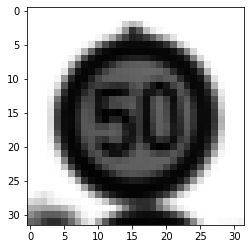

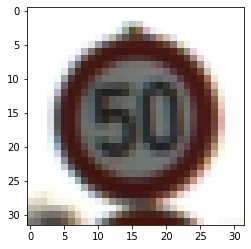

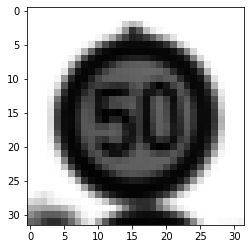

In [19]:
#Visualize images and compare with original
i = 950
plt.imshow(X_train_grey[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_grey_norm[i].squeeze(), cmap = 'gray')

# <u>**Model Training**

The model consists of the following layers: 

- **1: THE FIRST CONVOLUTIONAL LAYER**
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- **2: THE SECOND CONVOLUTIONAL LAYER**
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- **3: FLATTENING THE NETWORK**
    - Flatten the network with Input = 5x5x16 and Output = 400

- **4: FULLY CONNECTED LAYER**
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- **5: ANOTHER FULLY CONNECTED LAYER**
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- **6: FULLY CONNECTED LAYER**
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [26]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [29]:
cnn_model = Sequential()

# first convolutional layer
cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

# Second convolutional layer and average pooling
cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

#Flattening
cnn_model.add(Flatten())

#Fully connected layers and output
cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [30]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [36]:
history = cnn_model.fit(X_train_grey_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_val_grey_norm,y_val))

Epoch 1/50
70/70 [==============================] - 5s 64ms/step - loss: 3.0309 - accuracy: 0.2038 - val_loss: 2.5213 - val_accuracy: 0.3313
Epoch 2/50
70/70 [==============================] - 4s 60ms/step - loss: 1.8521 - accuracy: 0.4812 - val_loss: 1.8803 - val_accuracy: 0.4370
Epoch 3/50
70/70 [==============================] - 4s 60ms/step - loss: 1.2415 - accuracy: 0.6359 - val_loss: 1.2404 - val_accuracy: 0.6023
Epoch 4/50
70/70 [==============================] - 4s 60ms/step - loss: 0.9261 - accuracy: 0.7254 - val_loss: 0.9904 - val_accuracy: 0.7102
Epoch 5/50
70/70 [==============================] - 4s 61ms/step - loss: 0.7395 - accuracy: 0.7819 - val_loss: 0.8970 - val_accuracy: 0.7297
Epoch 6/50
70/70 [==============================] - 4s 63ms/step - loss: 0.6074 - accuracy: 0.8221 - val_loss: 0.7563 - val_accuracy: 0.7721
Epoch 7/50
70/70 [==============================] - 4s 60ms/step - loss: 0.5098 - accuracy: 0.8510 - val_loss: 0.7191 - val_accuracy: 0.7764
Epoch 8/50
70

# <u>**Model Evaluation**

In [41]:
score = cnn_model.evaluate(X_val_grey_norm, y_val)
print('Test Accuracy:{}'.format(score[1]))

138/138 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.8946
Test Accuracy:0.8945578336715698


In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

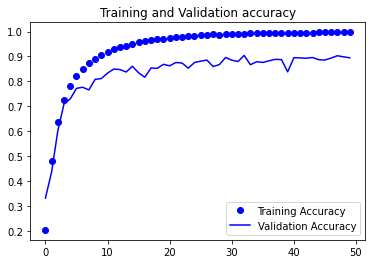

In [44]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

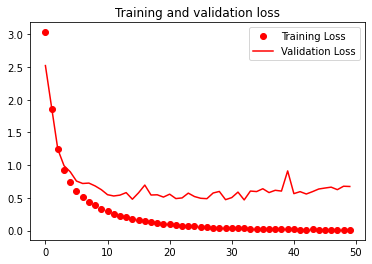

In [45]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()